In [1]:
# Imports pour lire les fichiers audio
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix,classification_report
# Imports pour le modèle et le prétraitement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import librosa
import librosa.display
import IPython.display as ipd
import multiprocessing as mp
import timeit
from tqdm import tqdm
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
import tensorflow.keras.layers as L
from keras.callbacks import EarlyStopping 
from tensorflow.keras.models import Sequential, model_from_json 
from tensorflow.keras.models import Sequential, model_from_json

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import tensorflow as tf 
print("Done")

Done


In [3]:
#!apt-get update
#!apt-get install -y libsndfile1

In [4]:
#!pipreqsnb --savepath /kaggle/working/requirements.txt

# Importing Data

In [5]:
ravdess = 'archive'
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [6]:
len(ravdess_directory_list)

25

# preprocessing

In [7]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    # Ajouter la barre oblique entre 'ravdess' et 'i' pour construire le bon chemin
    actor_dir = os.path.join(ravdess, i)
    
    # Vérifier que le chemin est un répertoire
    if os.path.isdir(actor_dir):
        # Extraire les fichiers pour chaque acteur
        actor = os.listdir(actor_dir)
        
        for f in actor:
            part = f.split('.')[0].split('-')
            
            # Vérifier qu'il y a bien au moins trois éléments dans `part`
            if len(part) > 2:
                # La troisième partie représente l'émotion associée
                file_emotion.append(int(part[2]))
                file_path.append(os.path.join(actor_dir, f))
            else:
                print(f"Avertissement : le fichier '{f}' ne suit pas le format attendu.")


Avertissement : le fichier 'Actor_01' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_02' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_03' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_04' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_05' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_06' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_07' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_08' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_09' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_10' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_11' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_12' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_13' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_14' ne suit pas le format attendu.
Avertissement : le fichier 'Actor_

In [8]:
print(actor[0])
print(part[0])
print(file_path[0])
print(f)

Actor_01
Actor_24
archive\Actor_01\03-01-01-01-01-01-01.wav
Actor_24


In [9]:
if len(part) > 2:  
    print(int(part[2]))  
else:  
    print("Error: 'part' list has fewer than 3 elements.") 

Error: 'part' list has fewer than 3 elements.


In [10]:
print(actor[0])  
print(part[0])  
print(file_path[0])  

if len(part) > 2:  
    print(int(part[2]))  
else:  
    print("Error: 'part' list has fewer than 3 elements.")  

print(f) 

Actor_01
Actor_24
archive\Actor_01\03-01-01-01-01-01-01.wav
Error: 'part' list has fewer than 3 elements.
Actor_24


In [11]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                       Path
0  neutral  archive\Actor_01\03-01-01-01-01-01-01.wav
1  neutral  archive\Actor_01\03-01-01-01-01-02-01.wav
2  neutral  archive\Actor_01\03-01-01-01-02-01-01.wav
3  neutral  archive\Actor_01\03-01-01-01-02-02-01.wav
4  neutral  archive\Actor_01\03-01-02-01-01-01-01.wav
______________________________________________
      Emotions                                       Path
1435  surprise  archive\Actor_24\03-01-08-01-02-02-24.wav
1436  surprise  archive\Actor_24\03-01-08-02-01-01-24.wav
1437  surprise  archive\Actor_24\03-01-08-02-01-02-24.wav
1438  surprise  archive\Actor_24\03-01-08-02-02-01-24.wav
1439  surprise  archive\Actor_24\03-01-08-02-02-02-24.wav
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


# Integration

In [12]:
data_path = ravdess_df
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,archive\Actor_01\03-01-01-01-01-01-01.wav
1,neutral,archive\Actor_01\03-01-01-01-01-02-01.wav
2,neutral,archive\Actor_01\03-01-01-01-02-01-01.wav
3,neutral,archive\Actor_01\03-01-01-01-02-02-01.wav
4,neutral,archive\Actor_01\03-01-02-01-01-01-01.wav


In [13]:
print(data_path.Emotions.value_counts())

Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


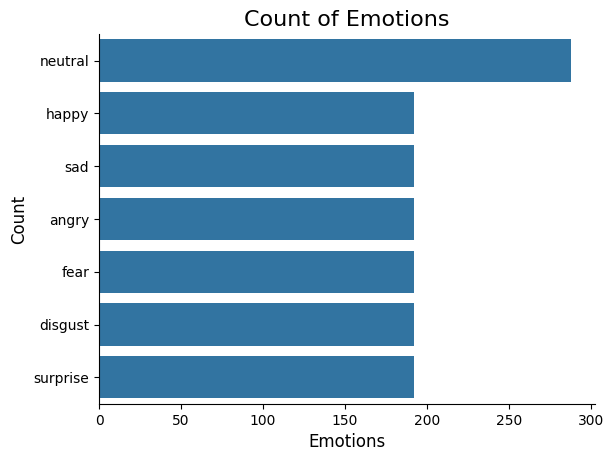

In [14]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [15]:
data,sr = librosa.load(file_path[0])
sr

22050

In [16]:
ipd.Audio(data,rate=sr)

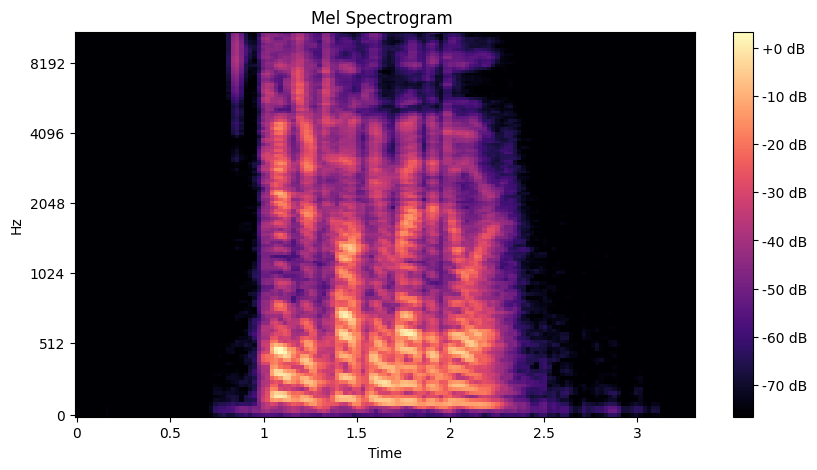

In [17]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

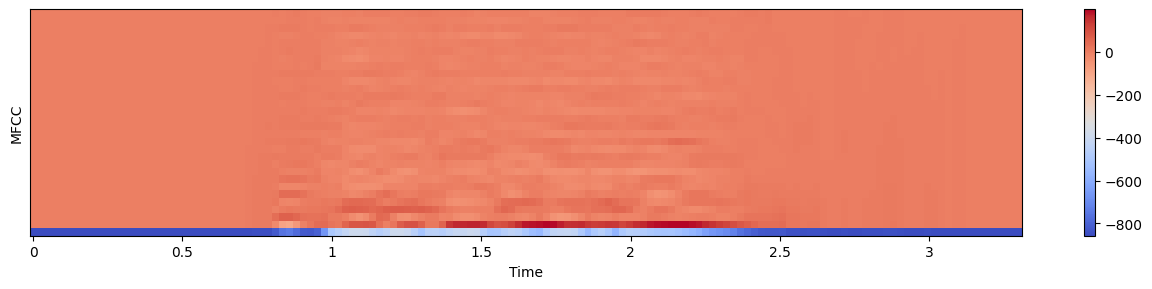

In [18]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [19]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

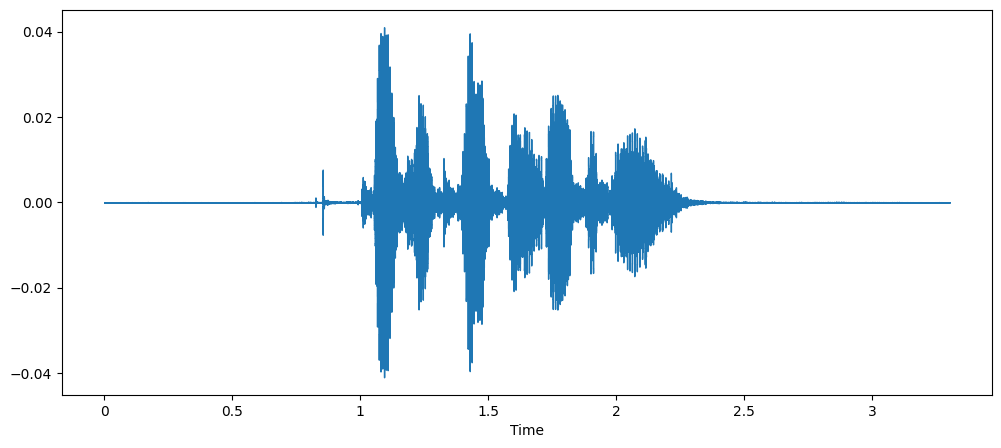

In [20]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

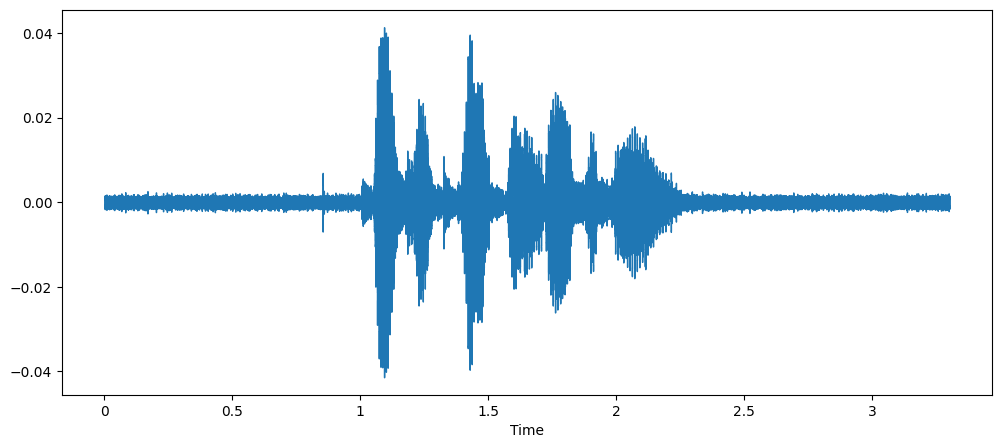

In [21]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

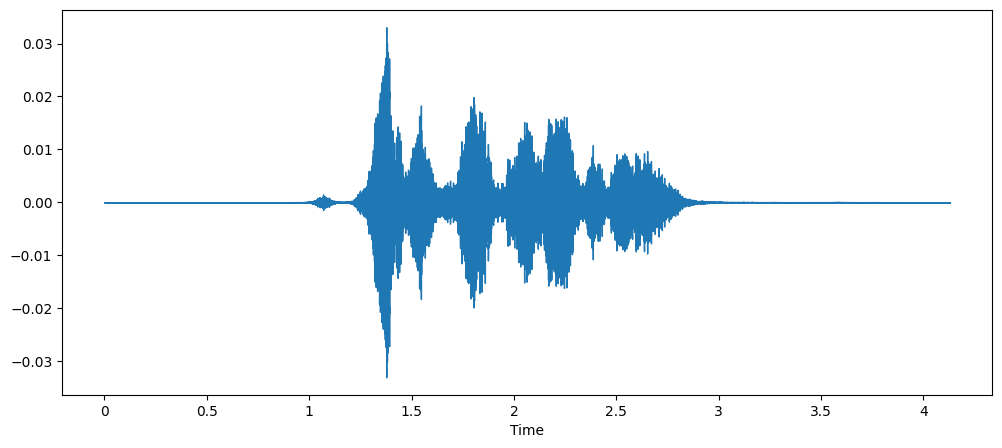

In [22]:
# Define the stretch function  
def stretch(data, rate=0.8):  
    return librosa.effects.time_stretch(data, rate=rate)  # Ensure rate is passed as a keyword argument  

# Example usage  
# Ensure that `data` and `sr` are defined and loaded earlier in your code  
# For example:  
# data, sr = librosa.load('your_audio_file.wav', sr=None)  

# STRETCHED AUDIO  
x = stretch(data)  # Use the stretch function  
plt.figure(figsize=(12, 5))  
librosa.display.waveshow(y=x, sr=sr)  
ipd.Audio(x, rate=sr) 

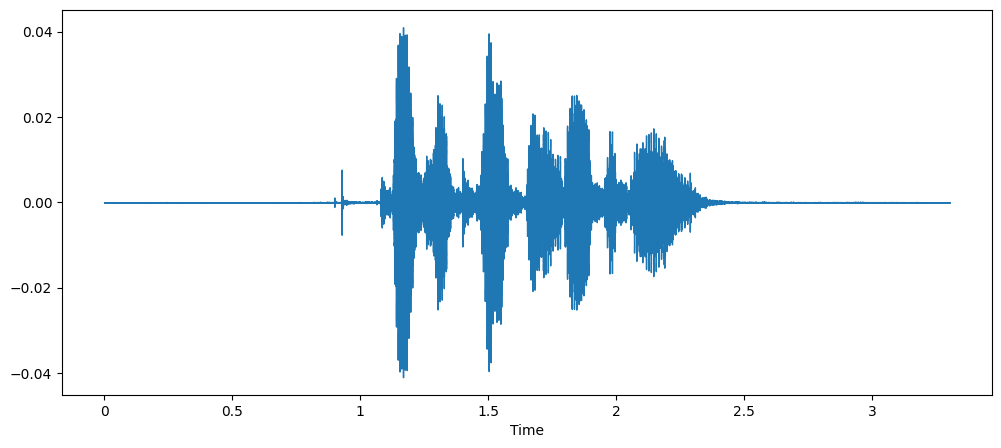

In [23]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

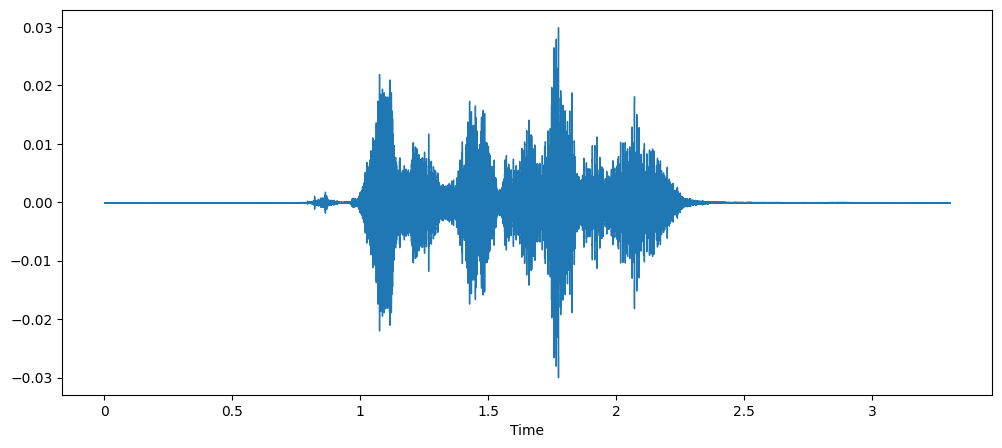

In [24]:
# Define the pitch function  
def pitch(data, sampling_rate, pitch_factor=0.7):  
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)  

# Example usage  
# Ensure that `data` and `sr` are defined and loaded earlier in your code  
# For example:  
# data, sr = librosa.load('your_audio_file.wav', sr=None)  

# AUDIO WITH PITCH  
x = pitch(data, sr)  # Use the pitch function  
plt.figure(figsize=(12, 5))  
librosa.display.waveshow(y=x, sr=sr)  
ipd.Audio(x, rate=sr)  

# Feature extraction

In [25]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [26]:
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


# Noraml way to get features

In [27]:
def rmse(data, frame_length=2048, hop_length=512):  
    # Create an RMS array  
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  # 'y' is now the first parameter  
    return np.squeeze(rmse)  # Ensure it's in the right shape if needed

In [28]:
def mfcc(data, sr=22050, frame_length=2048, hop_length=512, flatten=True):  
    # Corrected call to librosa feature  
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T) 

In [29]:
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):  
    result = np.array([])  
    # Extract features and concatenate them  
    result = np.hstack((  
        zcr(data, frame_length, hop_length),  # Assuming you have a zero crossing rate function defined  
        rmse(data, frame_length, hop_length),  
        mfcc(data, sr, frame_length, hop_length)  # Call to corrected 'mfcc'  
    ))  
    return result  

def rmse(data, frame_length=2048, hop_length=512):  
    # Corrected call to librosa feature  
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  
    return np.squeeze(rmse)  

def mfcc(data, sr=22050, frame_length=2048, hop_length=512, flatten=True):  
    # Corrected call to librosa feature  
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)  

def get_features(path, duration=2.5, offset=0.6):  
    # Load audio data  
    data, sr = librosa.load(path, duration=duration, offset=offset)  
    # Extract features  
    aud = extract_features(data, sr)  
    return aud  

# Main processing code  
start = timeit.default_timer()  
X, Y = [], []  
for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):  
    features = get_features(path)  
    if index == 100:  
        print(f'{index} audio has been processed')  
        break  
    for i in features:  
        X.append(i)  
        Y.append(emotion)  
print('Done')  
stop = timeit.default_timer()  
print('Time: ', stop - start)

100it [00:01, 97.32it/s]

100 audio has been processed
Done
Time:  1.0360799999907613


# Faster way to get features

The .extend() method increases the length of the list by the number of elements that are provided to the method, so if you want to add multiple elements to the list, you can use this method.

In [30]:
len(X), len(Y), data_path.Path.shape

(237600, 237600, (1440,))

# Saving features

In [31]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,Emotions
0,0.173828,neutral
1,0.264648,neutral
2,0.372559,neutral
3,0.486328,neutral
4,0.625488,neutral


In [32]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,Emotions
0,0.173828,neutral
1,0.264648,neutral
2,0.372559,neutral
3,0.486328,neutral
4,0.625488,neutral


In [33]:
print(Emotions.isna().any())

0           False
Emotions    False
dtype: bool


In [34]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
Emotions    False
dtype: bool


(237600, 2)

In [35]:
np.sum(Emotions.isna())

0           0
Emotions    0
dtype: int64

# Data preparation

In [36]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [37]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [38]:
print(Y.shape)

(237600, 7)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((190080, 1), (190080, 7), (47520, 1), (47520, 7))

In [40]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((190080, 1), (190080, 7), (47520, 1), (47520, 7))

In [41]:
from keras.callbacks import ModelCheckpoint  

model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [42]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [43]:
early_stop

In [44]:
lr_reduction

# LSTM Model

In [45]:
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,967 (3.27 MB)

 Trainable params: 856,967 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
hist=model01.fit(x_train, y_train,
                 epochs=20,
                validation_data=(x_test, y_test),batch_size=64,
                verbose=1)

Epoch 1/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - accuracy: 0.2404 - loss: 1.8854 - val_accuracy: 0.2431 - val_loss: 1.8769
Epoch 2/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - accuracy: 0.2478 - loss: 1.8749 - val_accuracy: 0.2462 - val_loss: 1.8724
Epoch 3/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - accuracy: 0.2489 - loss: 1.8719 - val_accuracy: 0.2464 - val_loss: 1.8702
Epoch 4/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.2467 - loss: 1.8697 - val_accuracy: 0.2457 - val_loss: 1.8684
Epoch 5/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.2471 - loss: 1.8696 - val_accuracy: 0.2455 - val_loss: 1.8680
Epoch 6/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 70s 24ms/step - accuracy: 0.2490 - loss: 1.8667 - val_accuracy: 0.2455 - val_loss: 1.8667
Epoch 7/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - accuracy: 0.2484 - loss: 1.8671 - val_accuracy: 0.2467 - val_loss: 1.8657
Epoch 8/20
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 52s 12ms/step - accuracy: 0.2471 -

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2477 - loss: 1.8598
Accuracy of our model on test data :  24.749578535556793 %


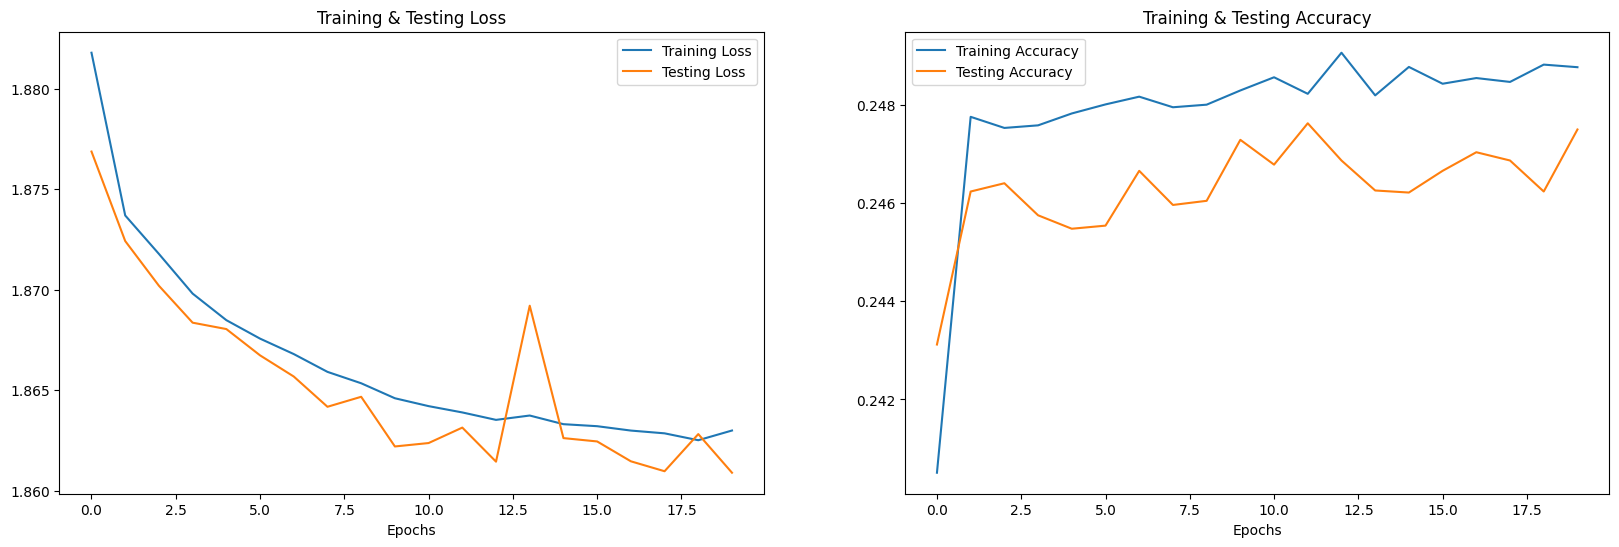

In [47]:
print("Accuracy of our model on test data : " , model01.evaluate(x_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# CNN model

In [48]:
#Reshape for CNN MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((190080, 1, 1), (190080, 7), (47520, 1, 1), (47520, 7))

In [49]:
# Define input dimension and number of classes  
input_dim = 20  # Example: set this to your actual input dimension  
num_classes = 3  # Example: set this to the actual number of classes in your output  

# Define the model  
model = Sequential()  
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))  
model.add(Dense(num_classes, activation='softmax'))  

# Compile the model  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model = tf.keras.Sequential([  
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the second max pooling layer  
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the fourth max pooling layer  
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),  
    L.BatchNormalization(),  
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),  
    L.Dropout(0.2),  # Add dropout layer after the fifth max pooling layer  
    
    L.Flatten(),  
    L.Dense(512, activation='relu'),  
    L.BatchNormalization(),  
    L.Dense(7, activation='softmax')  
])  

# Correct metrics argument  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         3,59

 Total params: 2,343,559 (8.94 MB)

 Trainable params: 2,339,207 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [51]:
# Update EarlyStopping initialization  
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

In [52]:
# Assuming early_stop, lr_reduction, model_checkpoint are pre-defined appropriately  

# Example of defining EarlyStopping correctly  
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)  

# Fit the model  
history = model.fit(x_traincnn, y_train, epochs=10, validation_data=(x_testcnn, y_test),   
                    batch_size=64, callbacks=[early_stop, lr_reduction, model_checkpoint])

Epoch 1/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 258s 83ms/step - accuracy: 0.2173 - loss: 1.9812 - val_accuracy: 0.2362 - val_loss: 1.9061 - learning_rate: 0.0010
Epoch 2/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 289s 97ms/step - accuracy: 0.2367 - loss: 1.9096 - val_accuracy: 0.2338 - val_loss: 1.9347 - learning_rate: 0.0010
Epoch 3/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 274s 92ms/step - accuracy: 0.2368 - loss: 1.9030 - val_accuracy: 0.2344 - val_loss: 1.9494 - learning_rate: 0.0010
Epoch 4/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 288s 97ms/step - accuracy: 0.2407 - loss: 1.8948 - val_accuracy: 0.2416 - val_loss: 1.8856 - learning_rate: 0.0010
Epoch 5/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 292s 98ms/step - accuracy: 0.2434 - loss: 1.8893 - val_accuracy: 0.2463 - val_loss: 1.8775 - learning_rate: 0.0010
Epoch 6/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 291s 98ms/step - accuracy: 0.2452 - loss: 1.8810 - val_accuracy: 0.2429 - val_loss: 1.8950 - learning_rate: 0.0010
Epoch 7/10
2970/2970 ━━━━━━━━━━━━━━━━━━━━ 220s 74ms/step -

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2466 - loss: 1.8682
Accuracy of our model on test data :  24.501262605190277 %


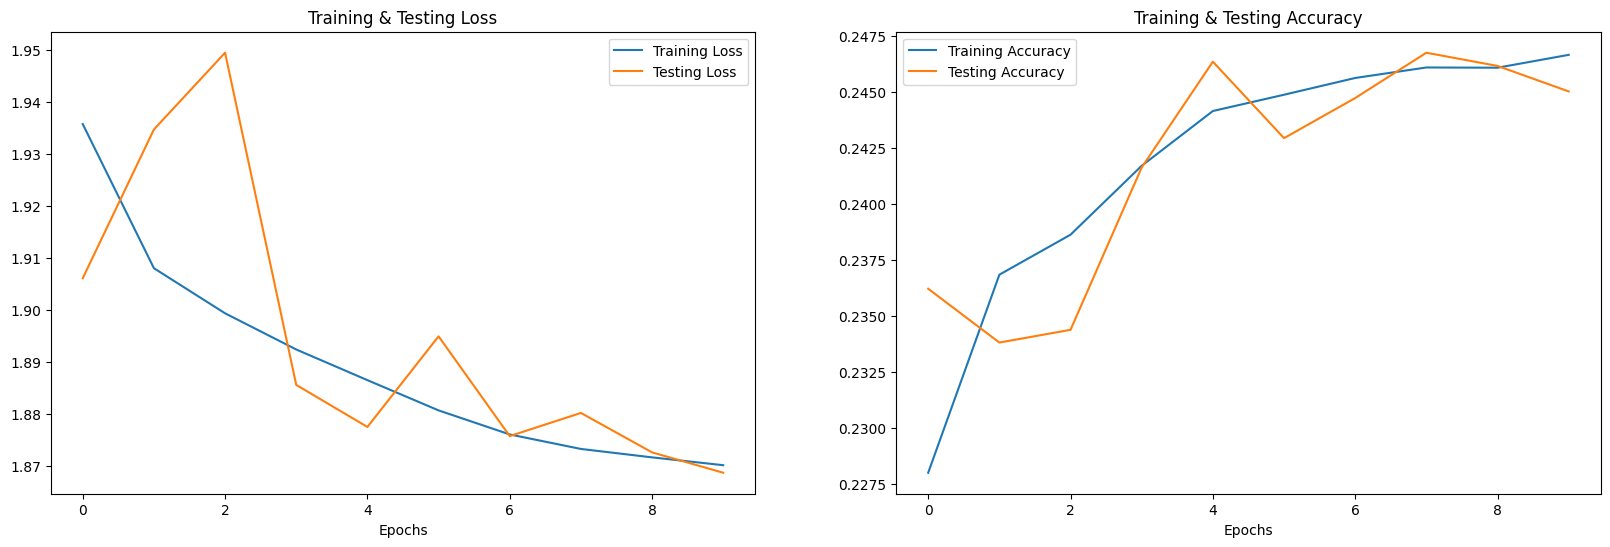

In [53]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [54]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step


,Predicted Labels,Actual Labels
0,neutral,sad
1,neutral,happy
2,neutral,fear
3,neutral,angry
4,neutral,sad
5,neutral,fear
6,neutral,angry
7,neutral,happy
8,neutral,disgust
9,neutral,neutral


In [55]:
df0

,Predicted Labels,Actual Labels
0,neutral,sad
1,neutral,happy
2,neutral,fear
3,neutral,angry
4,neutral,sad
...,...,...
47515,neutral,neutral
47516,neutral,neutral
47517,neutral,angry
47518,neutral,neutral


# Evalutation

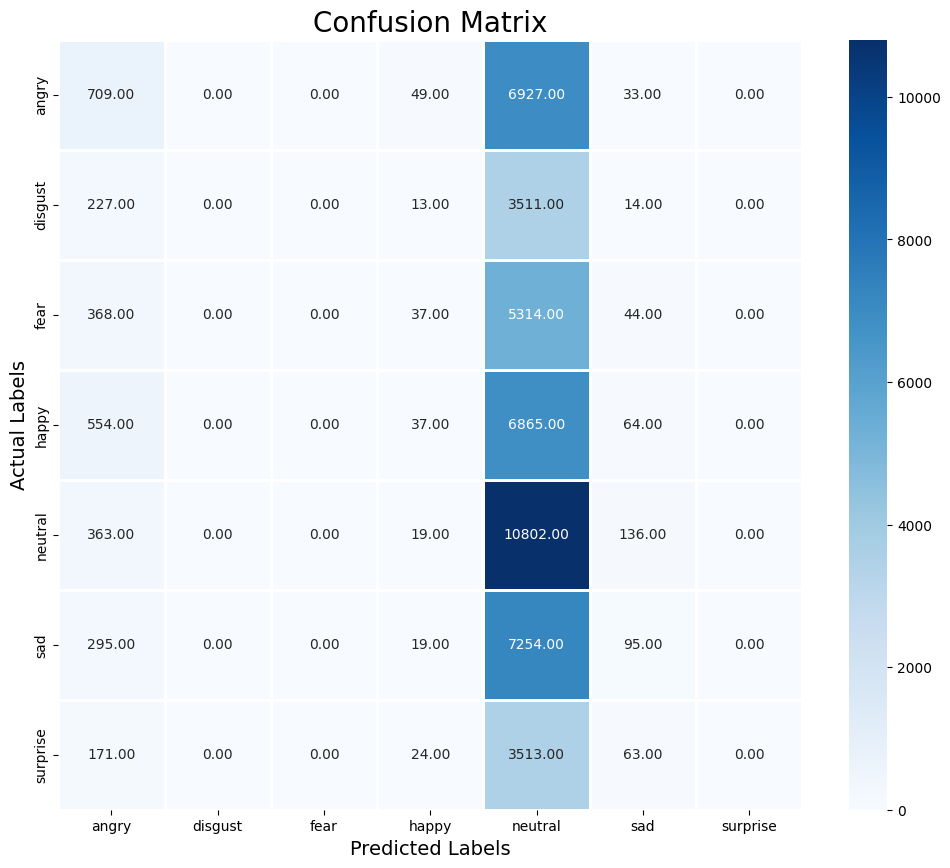

              precision    recall  f1-score   support

       angry       0.26      0.09      0.14      7718
     disgust       0.00      0.00      0.00      3765
        fear       0.00      0.00      0.00      5763
       happy       0.19      0.00      0.01      7520
     neutral       0.24      0.95      0.39     11320
         sad       0.21      0.01      0.02      7663
    surprise       0.00      0.00      0.00      3771

    accuracy                           0.25     47520
   macro avg       0.13      0.15      0.08     47520
weighted avg       0.16      0.25      0.12     47520



In [56]:
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [57]:
# Serialize the model to JSON  
model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

# Serialize weights to HDF5 with the correct filename  
model.save_weights("Best_model_weights.weights.h5")  # Change made here  
print("Saved model to disk") 

Saved model to disk


In [58]:
# Assume `model` has been defined and trained before this point  
model.summary()  

# Serialize the model to JSON  
model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

# Serialize weights to HDF5 with the correct filename  
model.save_weights("Best_model_weights.weights.h5")  # Corrected filename  
print("Saved model to disk")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         3,59

 Total params: 7,021,975 (26.79 MB)

 Trainable params: 2,339,207 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

 Optimizer params: 4,678,416 (17.85 MB)

Saved model to disk


In [59]:
json_file = open('Best_model.json', 'r')  # If saved in the same directory  
loaded_model_json = json_file.read()  
json_file.close()  

# Adjust the weights file path accordingly  
loaded_model = model_from_json(loaded_model_json)  
loaded_model.load_weights("Best_model_weights.weights.h5")  # Update name if necessary

In [60]:
# Check if the file exists  
if os.path.exists('Best_model.json'):  
    json_file = open('Best_model.json', 'r')  
    loaded_model_json = json_file.read()  
    json_file.close()  
    loaded_model = model_from_json(loaded_model_json)  
    loaded_model.load_weights("Best_model_weights.weights.h5")  # Ensure correct filename here  
    print("Loaded model from disk")  
else:  
    print("Best_model.json not found in the specified directory.")

Loaded model from disk


In [61]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2466 - loss: 1.8682
compile_metrics: 24.50%


# Saving and Loading our Standard Scaler and encoder

In [62]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")

Done


# Test script

In [63]:
# List files in the /kaggle/working directory  
print(os.listdir('archive')) 

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24', 'audio_speech_actors_01-24']


In [64]:
json_file = open('Best_model.json', 'r')  # Change path if it's in your working directory 

In [65]:
# Ensure this is run in the same environment (Kaggle)  
model_json = model.to_json()  
with open("Best_model.json", "w") as json_file:  
    json_file.write(model_json)  

model.save_weights("Best_model_weights.weights.h5")  
print("Saved model to disk") 

Saved model to disk


In [66]:
# After confirming the file exists  
with open('Best_model.json', 'r') as json_file:  
    loaded_model_json = json_file.read()  

loaded_model = model_from_json(loaded_model_json)  
loaded_model.load_weights("Best_model_weights.weights.h5")  # Ensure the correct weights filename  
print("Loaded model from disk")

Loaded model from disk


In [67]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [68]:
def get_predict_feat(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    features = extract_features(data)
    features = np.reshape(features, newshape=(1, 2376))  # Adjust feature shape as needed
    scaled_features = scaler.transform(features)
    final_features = np.expand_dims(scaled_features, axis=2)
    
    return final_features

In [69]:
def rmse(data, frame_length=2048, hop_length=512):  
    # Use the 'y' keyword argument to pass the audio data  
    rmse_result = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  
    return np.squeeze(rmse_result) 

In [70]:
features = np.reshape(features, newshape=(1, -1))  # 1 sample, many features 

In [71]:
from sklearn.preprocessing import StandardScaler  

# Assuming you have already created and fitted the scaler with a training set  
scaler = StandardScaler()  # Create your scaler object  
# Fit your scaler on data with the correct number of features  
# scaler.fit(training_data)  # Ensure training_data has the same features  

def get_predict_feat(path):  
    # Load audio file  
    data, sr = librosa.load(path, duration=2.5, offset=0.6)  
    features = extract_features(data, sr)  # Extract features  
    features = np.reshape(features, newshape=(1, -1))  # Reshape to 1xN for scaling  
    print("Extracted Features Shape:", features.shape)  # Debugging line  
    scaled_features = scaler.transform(features)  # Scale the features  
    return scaled_features  # Return the scaled features  

In [73]:
# Function to compute Zero-Crossing Rate  
def zcr(data, frame_length=2048, hop_length=512):  
    return librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)  

# Function to compute Root Mean Square Energy  
def rmse(data, frame_length=2048, hop_length=512):  
    return librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)  

# Function to compute MFCC features  
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):  
    mfcc_features = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)  
    return np.squeeze(mfcc_features.T) if not flatten else np.ravel(mfcc_features.T)  

# Main feature extraction function  
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):  
    result = np.array([])  
    
    result = np.hstack((  
        result,  
        zcr(data, frame_length, hop_length).flatten(),  
        rmse(data, frame_length, hop_length).flatten(),  
        mfcc(data, sr, frame_length, hop_length)  
    ))  
    
    return result  

# Function to load audio and extract features  
def get_predict_feat(path):  
    # Load audio file  
    data, sr = librosa.load(path, duration=2.5, offset=0.6)  
    features = extract_features(data, sr)  # Extract features  
    features = np.reshape(features, newshape=(1, -1))  # Reshape to 1xN for scaling  
    print("Current Features Shape:", features.shape)  # Debugging line  
    
    return features  # Return the scaled features  

# Example usage  
if __name__ == "__main__":  
    res = get_predict_feat("archive/Actor_01/03-01-07-01-01-01-01.wav")  
    print("Extracted Features Shape:", res.shape)

Current Features Shape: (1, 2376)
Extracted Features Shape: (1, 2376)


In [74]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    features = get_predict_feat(path1)
    predictions = loaded_model.predict(features)
    y_pred = encoder.inverse_transform(predictions)
    print("Predicted Emotion:", y_pred[0][0])

In [75]:
# To check the input shape of your model  
loaded_model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 512)         │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         3,59

 Total params: 7,021,975 (26.79 MB)

 Trainable params: 2,339,207 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

 Optimizer params: 4,678,416 (17.85 MB)

In [76]:
features = np.reshape(features, (1, 12, 198))

In [77]:
import numpy as np  

# Determine the correct number of timesteps and features based on model summary  
timesteps = 12  # Example value, adjust as per model requirement  
features_per_timestep = 2376 // timesteps  # Calculate how many features per timestep  

# Ensure the reshaping is done correctly  
if features.shape[1] == 2376:  
    features = np.reshape(features, (1, timesteps, features_per_timestep))  
    print("Features Shape After Reshape:", features.shape)  # Verify shape after reshape  

    # Run predictions  
    predictions = loaded_model.predict(features)  
    y_pred = encoder.inverse_transform(predictions)  
    print("Predicted Emotion:", y_pred[0][0])  
else:  
    print(f"Unexpected features shape: {features.shape}. Expected shape: (1, *, 2376).")

Unexpected features shape: (1, 12, 198). Expected shape: (1, *, 2376).


In [80]:
def prediction(path1):  
    features = get_predict_feat(path1)  
    print("Current Features Shape:", features.shape)  
    
    # Check model input shape  
    # Let's assume expected is (None, 5, 792) based on your model summary  
    expected_timesteps = 5  
    features_per_timestep = 792  # Adjust this based on your model needs  
    
    # Check if reshaping is needed based on model's input shape  
    if features.shape == (1, 2376):  
        if 2376 % expected_timesteps == 0:  
            features_per_timestep = 2376 // expected_timesteps  
            features = np.reshape(features, (1, expected_timesteps, features_per_timestep))  
            print("Reshaped Features:", features.shape)  # Check what the new shape is  
            
            # Make prediction  
            predictions = loaded_model.predict(features)  
            y_pred = encoder.inverse_transform(predictions)  
            print("Predicted Emotion:", y_pred[0][0])  
        else:  
            print("The features array cannot be evenly split into timesteps.")  
    else:  
        print("Unexpected features shape: ", features.shape)  

# Call the prediction function  
if __name__ == "__main__":  
    prediction("archive/Actor_02/03-01-01-01-01-01-02.wav")

Current Features Shape: (1, 2376)
Current Features Shape: (1, 2376)
The features array cannot be evenly split into timesteps.


In [ ]:
import numpy as np  
import pandas as pd  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split  

# Assuming Emotions DataFrame is already available  
# Extracting X (features) and Y (emotions)  
X = Emotions.iloc[:, :-1].values  
Y = Emotions['Emotions'].values  

# One-hot encoding Y  
encoder = OneHotEncoder()  
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()  

# Train-test split with stratification  
x_train, x_test, y_train, y_test = train_test_split(X, Y_encoded, random_state=42, test_size=0.2, shuffle=True, stratify=Y)  

# Flattening X for classifiers like Random Forest and SVM  
x_train_flat = x_train  
x_test_flat = x_test  

# Decoding one-hot encoded labels for classifiers  
y_train_decoded = np.argmax(y_train, axis=1)  
y_test_decoded = np.argmax(y_test, axis=1)  

# Scale features for SVM  
scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train_flat)  
x_test_scaled = scaler.transform(x_test_flat)  

# Random Forest Classifier  
def build_rf_model():  
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)  # Use fewer estimators and parallel processing  
    rf_model.fit(x_train_flat, y_train_decoded)  
    y_pred_rf = rf_model.predict(x_test_flat)  
    accuracy_rf = accuracy_score(y_test_decoded, y_pred_rf) * 100  
    return rf_model, accuracy_rf, y_pred_rf  

# SVM Classifier  
def build_svm_model():  
    svm_model = SVC(kernel='linear', C=0.1, probability=True)  # Use linear kernel for faster training  
    svm_model.fit(x_train_scaled, y_train_decoded)  
    y_pred_svm = svm_model.predict(x_test_scaled)  
    accuracy_svm = accuracy_score(y_test_decoded, y_pred_svm) * 100  
    return svm_model, accuracy_svm, y_pred_svm  

# Build and evaluate Random Forest  
rf_model, accuracy_rf, y_pred_rf = build_rf_model()  
print(f"Random Forest accuracy: {accuracy_rf}%")  
print(f"Random Forest Classification Report:\n{classification_report(y_test_decoded, y_pred_rf)}")  

# Build and evaluate SVM  
svm_model, accuracy_svm, y_pred_svm = build_svm_model()  
print(f"SVM accuracy: {accuracy_svm}%")  
print(f"SVM Classification Report:\n{classification_report(y_test_decoded, y_pred_svm)}")  

# Visual Comparison of Models  
models = ['Random Forest', 'SVM']  
accuracies = [accuracy_rf, accuracy_svm]  

plt.figure(figsize=(10, 6))  
sns.barplot(x=models, y=accuracies, palette='viridis')  
plt.title("Model Accuracy Comparison (Random Forest vs SVM)")  
plt.ylabel("Accuracy (%)")  
plt.ylim(0, 100)  
plt.show()  

# Confusion Matrix for Random Forest  
plt.figure(figsize=(8, 6))  
cm_rf = confusion_matrix(y_test_decoded, y_pred_rf)  
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])  
plt.title("Random Forest Confusion Matrix")  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.show()  

# Confusion Matrix for SVM  
plt.figure(figsize=(8, 6))  
cm_svm = confusion_matrix(y_test_decoded, y_pred_svm)  
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])  
plt.title("SVM Confusion Matrix")  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.show()

Random Forest accuracy: 17.960858585858585%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.18      0.18      7603
           1       0.09      0.09      0.09      3802
           2       0.13      0.13      0.13      5702
           3       0.17      0.16      0.16      7603
           4       0.25      0.31      0.28     11405
           5       0.17      0.15      0.16      7603
           6       0.09      0.07      0.07      3802

    accuracy                           0.18     47520
   macro avg       0.15      0.15      0.15     47520
weighted avg       0.17      0.18      0.18     47520

